In [ ]:
#import necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

#=from google.colab.patches import cv2_imshow

import numpy as np
import cv2
import os

In [ ]:
prototxtPath = os.path.sep.join([r'/content/drive/MyDrive/facemask_detector', 'deploy.prototxt'])
weightsPath = os.path.sep.join([r'/content/drive/MyDrive/facemask_detector', 'res10_300x300_ssd_iter_140000.caffemodel'])

In [ ]:
prototxtPath

'/content/drive/MyDrive/facemask_detector/deploy.prototxt'

In [ ]:
weightsPath

'/content/drive/MyDrive/facemask_detector/res10_300x300_ssd_iter_140000.caffemodel'

In [ ]:
net=cv2.dnn.readNet(prototxtPath,weightsPath)

**Load and pre-process an input image**


In [ ]:
model = load_model(r'/content/drive/MyDrive/facemask_detector/mobilenet_v2.model')

In [ ]:
image = cv2.imread(r'/content/drive/MyDrive/facemask_detector/examples/example_03.png')

In [ ]:
image

array([[[141, 153, 181],
        [146, 158, 186],
        [139, 151, 179],
        ...,
        [161, 168, 187],
        [167, 174, 193],
        [176, 183, 202]],

       [[144, 156, 184],
        [146, 158, 186],
        [136, 148, 176],
        ...,
        [162, 169, 188],
        [165, 172, 191],
        [170, 177, 196]],

       [[143, 155, 183],
        [143, 155, 183],
        [134, 146, 174],
        ...,
        [164, 171, 190],
        [162, 169, 188],
        [163, 170, 189]],

       ...,

       [[ 26,  25,  15],
        [ 25,  24,  14],
        [ 22,  23,  13],
        ...,
        [ 27,  30,  28],
        [ 29,  32,  30],
        [ 32,  35,  33]],

       [[ 24,  23,  13],
        [ 24,  23,  13],
        [ 22,  23,  13],
        ...,
        [ 28,  31,  29],
        [ 30,  33,  31],
        [ 33,  36,  34]],

       [[ 23,  22,  12],
        [ 23,  22,  12],
        [ 22,  23,  13],
        ...,
        [ 29,  32,  30],
        [ 31,  34,  32],
        [ 34,  37,  35]]

In [ ]:
(h,w) = image.shape[:2]

In [ ]:
(h,w)

(564, 384)


Construct a blob from the image


Upon loading our image,  a copy is made and grab frame dimension for future scaling and display purposes. 


The image is resized to 300x300 pixels and pre-processed.


In [ ]:
blob = cv2.dnn.blobFromImage(image, 1.0, (300,300), (104.0,177.0,123.0))

In [ ]:
blob

array([[[[  39.,   38.,   42., ...,   57.,   60.,   68.],
         [  38.,   36.,   41., ...,   61.,   59.,   58.],
         [  35.,   38.,   42., ...,   59.,   58.,   57.],
         ...,
         [ -76.,  -80.,  -79., ...,  -73.,  -75.,  -73.],
         [ -78.,  -80.,  -81., ...,  -76.,  -76.,  -73.],
         [ -80.,  -81.,  -81., ...,  -75.,  -74.,  -71.]],

        [[ -22.,  -23.,  -19., ...,   -9.,   -6.,    2.],
         [ -23.,  -26.,  -20., ...,   -5.,   -8.,   -8.],
         [ -26.,  -24.,  -20., ...,   -7.,   -8.,   -9.],
         ...,
         [-150., -153., -151., ..., -143., -144., -143.],
         [-152., -153., -153., ..., -146., -146., -142.],
         [-154., -154., -153., ..., -145., -144., -141.]],

        [[  60.,   59.,   63., ...,   64.,   67.,   75.],
         [  59.,   57.,   62., ...,   68.,   65.,   65.],
         [  55.,   58.,   62., ...,   66.,   65.,   64.],
         ...,
         [-106., -109., -106., ...,  -91.,  -93.,  -91.],
         [-108., -109., -1

In [ ]:
blob.shape

(1, 3, 300, 300)

```
Pass the blob through the network and obtain the face detection

The pre-processing is handled by OpenCV's blobFromImage function
```

In [ ]:
net.setInput(blob)
detections=net.forward()

In [ ]:
detections

array([[[[0.        , 1.        , 0.99999464, ..., 0.15870972,
          0.7130451 , 0.5679675 ],
         [0.        , 1.        , 0.11887297, ..., 4.0124707 ,
          4.8448176 , 4.9845786 ],
         [0.        , 1.        , 0.11054549, ..., 4.015335  ,
          0.8335277 , 4.986985  ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

First, we'll ensure they meet the --confidence threshold before extracting the faceROIs

Which then loop over our detections and extract the confidence for measure.

A bounding box is computed for a particular face and ensure that the box falls within the boundaries of the image.

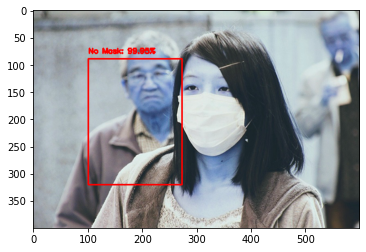

In [ ]:
#loop over the detections
for i in range(0,detections.shape[2]):
  confidence = detections[0,0,i,2]

  if confidence>0.5:
    #we need the X, Y coordinates
    box = detections[0,0,i,3:7]*np.array([w,h,w,h])
    (startX, startY, endX, endY) = box.astype('int')
    
    #ensure the bounding boxes fall within the dimensions of the frame
    (startX,startY) = (max(0,startX), max(0,startY))
    (endX,endY) = (min(w-1, endX), min(h-1,endY))

    #extract the face ROI, convert it from BGR to RGB channel, 
    #resize it 224,224 and preprocess it
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224,224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)

    (mask, withoutMask) = model.predict(face)[0]

    #determine the class label and color we will use to draw the bounding box and tex
    label = 'Mask' if mask>withoutMask else 'No Mask'
    color = (0,255,0) if label == 'Mask' else (255,0,0)

    #include the probability in the label
    label = "{}: {:.2f}%".format(label, max(mask,withoutMask)*100)

    #display the label and bounding boxes
    cv2.putText(image, label, (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(image)
plt.show()
#plt.savefig(r'/content/drive/MyDrive/facemask_detector/output/withoutmask_17178756.png')

#cv2.imshow("Output", image) 
#jupyter crash using cv2:imshow: display error 
#cv2.waitKey(0)
#cv2.destroyAllWindows()
